<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/1.5-Barrier_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit[visualization]
!pip install imgaug==0.2.5
!pip install pylatexenc

References:


* https://www.youtube.com/watch?v=tS2CMOyWFMQ
* https://www.youtube.com/watch?v=CdoCPz6TC9k
* https://qiskit.org/documentation/stubs/qiskit.circuit.library.Barrier.html




In [16]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf

mkdir: cannot create directory ‘/root/.qiskit’: File exists
[default]
circuit_drawer = mpl


## Barrier Operation
Barrier is a instruction for the transpiler. It says to the transpiler to stop optimizing gates. Optimizations between barriers are still optimized

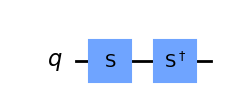

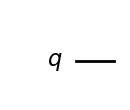

In [18]:
#Example where barrier is not used. Transpilation optimizes the circuit, removing the 2 unecessary operations
from qiskit import QuantumCircuit, transpile, Aer

qc = QuantumCircuit(1)
qc.s(0)
qc.sdg(0)

display(qc.draw())

be = Aer.get_backend("qasm_simulator")
qc_trans = transpile(qc, be)
display(qc_trans.draw())

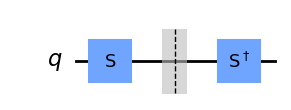

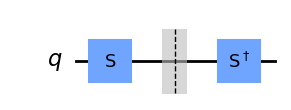

In [19]:
#Example where barrier is used. Note transpilation does NOT remove the gates, even when they are unecessary
from qiskit import QuantumCircuit, transpile, Aer

qc = QuantumCircuit(1)
qc.s(0)
qc.barrier()
qc.sdg(0)

display(qc.draw())

be = Aer.get_backend("qasm_simulator")
qc_trans = transpile(qc, be)
display(qc_trans.draw())

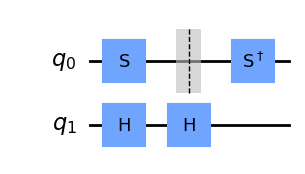

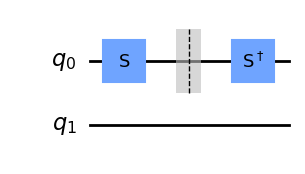

In [22]:
#One can choose which qubits are affected by the barrier, like in the example below... Note the Hadamard gates were removed, as their qubit is not part of the barrier
from qiskit import QuantumCircuit, transpile, Aer

qc = QuantumCircuit(2)
qc.s(0)
qc.h(1)
qc.barrier(0)
qc.sdg(0)

qc.h(1)

display(qc.draw())

be = Aer.get_backend("qasm_simulator")
qc_trans = transpile(qc, be)
display(qc_trans.draw())